## Output variable -> y
## Build a model to predict whether the client has subscribed a term deposit or not 

In [1]:
# Importing all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report

In [3]:
# Reading the dataset
deposit = pd.read_csv('bank_full.csv')
deposit

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,0,2143,1,0,unk0wn,5,may,261,1,-1,0,unk0wn,0
1,44,technician,single,secondary,0,29,1,0,unk0wn,5,may,151,1,-1,0,unk0wn,0
2,33,entrepreneur,married,secondary,0,2,1,1,unk0wn,5,may,76,1,-1,0,unk0wn,0
3,47,blue-collar,married,unk0wn,0,1506,1,0,unk0wn,5,may,92,1,-1,0,unk0wn,0
4,33,unk0wn,single,unk0wn,0,1,0,0,unk0wn,5,may,198,1,-1,0,unk0wn,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,0,825,0,0,cellular,17,0v,977,3,-1,0,unk0wn,1
45207,71,retired,divorced,primary,0,1729,0,0,cellular,17,0v,456,2,-1,0,unk0wn,1
45208,72,retired,married,secondary,0,5715,0,0,cellular,17,0v,1127,5,184,3,success,1
45209,57,blue-collar,married,secondary,0,668,0,0,telephone,17,0v,508,4,-1,0,unk0wn,0


In [4]:
deposit.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,0,2143,1,0,unk0wn,5,may,261,1,-1,0,unk0wn,0
1,44,technician,single,secondary,0,29,1,0,unk0wn,5,may,151,1,-1,0,unk0wn,0
2,33,entrepreneur,married,secondary,0,2,1,1,unk0wn,5,may,76,1,-1,0,unk0wn,0
3,47,blue-collar,married,unk0wn,0,1506,1,0,unk0wn,5,may,92,1,-1,0,unk0wn,0
4,33,unk0wn,single,unk0wn,0,1,0,0,unk0wn,5,may,198,1,-1,0,unk0wn,0


In [5]:
# Checking for any null values
deposit.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [6]:
deposit.describe()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,y
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,0.018027,1362.272058,0.555838,0.160226,15.806419,258.163080,2.763841,40.197828,0.580323,0.116985
std,10.618762,0.133049,3044.765829,0.496878,0.366820,8.322476,257.527812,3.098021,100.128746,2.303441,0.321406
min,18.000000,0.000000,-8019.000000,0.000000,0.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000
25%,33.000000,0.000000,72.000000,0.000000,0.000000,8.000000,103.000000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,0.000000,448.000000,1.000000,0.000000,16.000000,180.000000,2.000000,-1.000000,0.000000,0.000000
75%,48.000000,0.000000,1428.000000,1.000000,0.000000,21.000000,319.000000,3.000000,-1.000000,0.000000,0.000000
max,95.000000,1.000000,102127.000000,1.000000,1.000000,31.000000,4918.000000,63.000000,871.000000,275.000000,1.000000


In [7]:
deposit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  int64 
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  int64 
 7   loan       45211 non-null  int64 
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  int64 
dtypes: int64(11), object(6)
memory usage: 5.9+ MB


<AxesSubplot:xlabel='y', ylabel='age'>

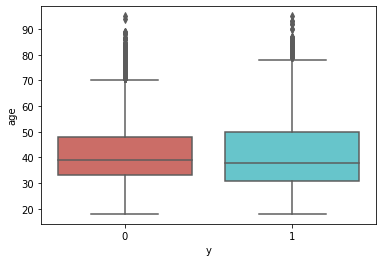

In [8]:
sns.boxplot(x = 'y', y = 'age', data = deposit, palette = 'hls')

<AxesSubplot:xlabel='y', ylabel='count'>

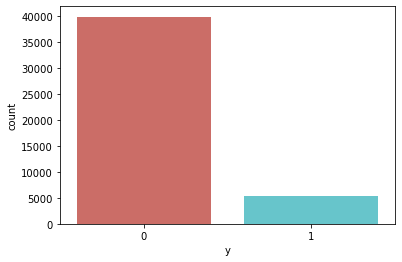

In [9]:
sns.countplot(x = 'y', data = deposit, palette = 'hls')

<AxesSubplot:xlabel='default', ylabel='count'>

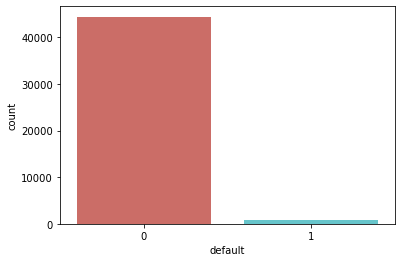

In [10]:
sns.countplot(x = 'default', data = deposit, palette = 'hls')

<AxesSubplot:xlabel='housing', ylabel='count'>

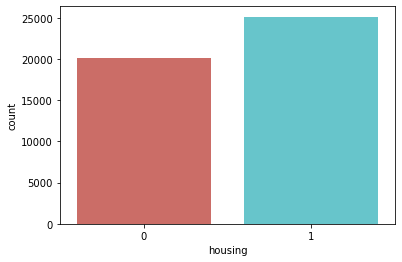

In [11]:
sns.countplot(x = 'housing', data = deposit, palette = 'hls')

<AxesSubplot:xlabel='loan', ylabel='count'>

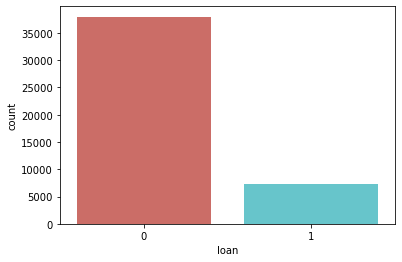

In [12]:
sns.countplot(x = 'loan', data = deposit, palette = 'hls')

In [13]:
pd.crosstab(deposit.y,deposit.loan)

loan,0,1
y,,
0,33162,6760
1,4805,484


<AxesSubplot:xlabel='y'>

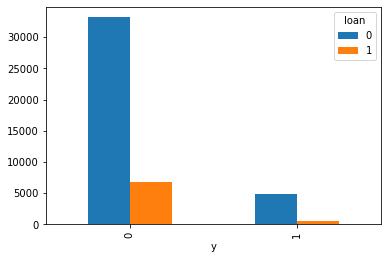

In [14]:
pd.crosstab(deposit.y,deposit.loan).plot(kind = 'bar')

In [15]:
pd.crosstab(deposit.y,deposit.housing)

housing,0,1
y,,
0,16727,23195
1,3354,1935


<AxesSubplot:xlabel='y'>

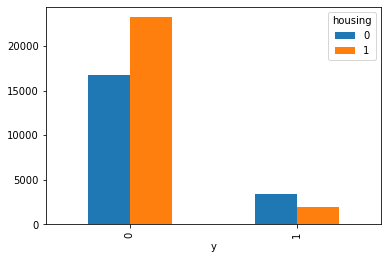

In [16]:
pd.crosstab(deposit.y,deposit.housing).plot(kind = 'bar')

In [17]:
deposit.drop(['job','marital','education','contact','month','poutcome'],inplace = True, axis = 1)

In [18]:
deposit

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,y
0,58,0,2143,1,0,5,261,1,-1,0,0
1,44,0,29,1,0,5,151,1,-1,0,0
2,33,0,2,1,1,5,76,1,-1,0,0
3,47,0,1506,1,0,5,92,1,-1,0,0
4,33,0,1,0,0,5,198,1,-1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
45206,51,0,825,0,0,17,977,3,-1,0,1
45207,71,0,1729,0,0,17,456,2,-1,0,1
45208,72,0,5715,0,0,17,1127,5,184,3,1
45209,57,0,668,0,0,17,508,4,-1,0,0


## Model Building

In [19]:
from sklearn.linear_model import LogisticRegression
deposit.shape

(45211, 11)

In [20]:
X=deposit.iloc[:,0:10]
Y=deposit.iloc[:,-1]
classifier=LogisticRegression()
classifier.fit(X,Y)

C:\Users\TECH\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [21]:
classifier.coef_

array([[-2.95661266e-02, -4.66873732e-02,  2.18540029e-05,
        -1.63661195e+00, -4.69580006e-01, -1.91305618e-02,
         3.69857490e-03, -1.86779239e-01,  2.73732796e-03,
         8.17937920e-02]])

In [22]:
classifier.predict_proba(X)

array([[0.96576806, 0.03423194],
       [0.96703797, 0.03296203],
       [0.97814477, 0.02185523],
       ...,
       [0.28109162, 0.71890838],
       [0.82951271, 0.17048729],
       [0.42398655, 0.57601345]])

In [23]:
y_pred=classifier.predict(X)
deposit["y_pred"] = y_pred
deposit

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,y,y_pred
0,58,0,2143,1,0,5,261,1,-1,0,0,0
1,44,0,29,1,0,5,151,1,-1,0,0,0
2,33,0,2,1,1,5,76,1,-1,0,0,0
3,47,0,1506,1,0,5,92,1,-1,0,0,0
4,33,0,1,0,0,5,198,1,-1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,0,825,0,0,17,977,3,-1,0,1,1
45207,71,0,1729,0,0,17,456,2,-1,0,1,0
45208,72,0,5715,0,0,17,1127,5,184,3,1,1
45209,57,0,668,0,0,17,508,4,-1,0,0,0


In [24]:
y_prob = pd.DataFrame(classifier.predict_proba(X.iloc[:,:]))
deposit1 = pd.concat([deposit,y_prob],axis = 1)
deposit1

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,y,y_pred,0,1
0,58,0,2143,1,0,5,261,1,-1,0,0,0,0.965768,0.034232
1,44,0,29,1,0,5,151,1,-1,0,0,0,0.967038,0.032962
2,33,0,2,1,1,5,76,1,-1,0,0,0,0.978145,0.021855
3,47,0,1506,1,0,5,92,1,-1,0,0,0,0.974754,0.025246
4,33,0,1,0,0,5,198,1,-1,0,0,0,0.776228,0.223772
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,0,825,0,0,17,977,3,-1,0,1,1,0.372838,0.627162
45207,71,0,1729,0,0,17,456,2,-1,0,1,0,0.857134,0.142866
45208,72,0,5715,0,0,17,1127,5,184,3,1,1,0.281092,0.718908
45209,57,0,668,0,0,17,508,4,-1,0,0,0,0.829513,0.170487


In [25]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y,y_pred)
print(confusion_matrix)

[[39080   842]
 [ 4209  1080]]


In [26]:
pd.crosstab(y_pred,Y)

y,0,1
row_0,,
0,39080,4209
1,842,1080


In [27]:
accuracy=sum(Y==y_pred)/deposit.shape[0]

In [28]:
accuracy

0.8882794010307226

In [29]:
from sklearn.metrics import classification_report
print(classification_report(Y,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     39922
           1       0.56      0.20      0.30      5289

    accuracy                           0.89     45211
   macro avg       0.73      0.59      0.62     45211
weighted avg       0.86      0.89      0.86     45211



In [30]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
Logit_roc_score=roc_auc_score(Y,classifier.predict(X))
Logit_roc_score

0.5915531315560522

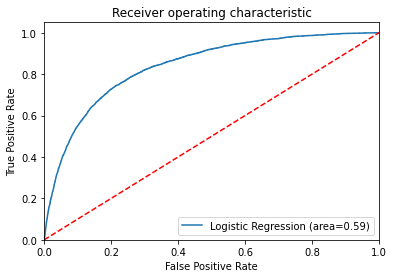

In [31]:
fpr, tpr, thresholds = roc_curve(Y,classifier.predict_proba(X)[:,1]) 
plt.plot(fpr, tpr, label='Logistic Regression (area=%0.2f)'% Logit_roc_score)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()  

In [32]:
y_prob1 = pd.DataFrame(classifier.predict_proba(X)[:,1]) 

In [33]:
y_prob1

,0
0,0.034232
1,0.032962
2,0.021855
3,0.025246
4,0.223772
...,...
45206,0.627162
45207,0.142866
45208,0.718908
45209,0.170487
